# Step 1: Split the dataset into training and testing sets

In [297]:
from sklearn.model_selection import train_test_split
import shutil
import os
import pandas as pd

emotions = ['angry', 'fear', 'happy', 'sad']
data_files = [[],[],[],[]]

for i, e in enumerate(emotions):
    path = './data_folder/' + e
    for root, dirs, files in os.walk(path):
        for file in files:
            data_files[i].append(file)
df = pd.DataFrame(data_files)
df = df.T
df.columns = ['angry', 'fear', 'happy', 'sad']

df_angry = df['angry']
df_fear = df['fear']
df_happy = df['happy']
df_sad = df['sad']
df_emotions = [df_angry, df_fear, df_happy, df_sad]

train_path = './train'
test_path = './test'
path = './data_folder/'
# os.makedirs('./train')
# os.makedirs('./test')

for ind, e in enumerate(df_emotions):
    df1 = e
    emotion = emotions[ind]
    train, test = train_test_split(df, random_state=15, train_size=0.7)
    train = train.reset_index(drop=True)
    test = test.reset_index(drop=True)
    # os.makedirs('./train/'+emotion)
    # os.makedirs('./test/'+emotion)
    for idx, i in train.iterrows():
        shutil.copy(path + emotion + '/' + i[emotion], train_path + '/' + emotion)
    for idx, j in test.iterrows():
        shutil.copy(path + emotion + '/' + j[emotion], test_path + '/' + emotion)


# Step 2: Exploratory Data Analysis (borrowed from sample code)

./train/angry/YAF_voice_angry.wav


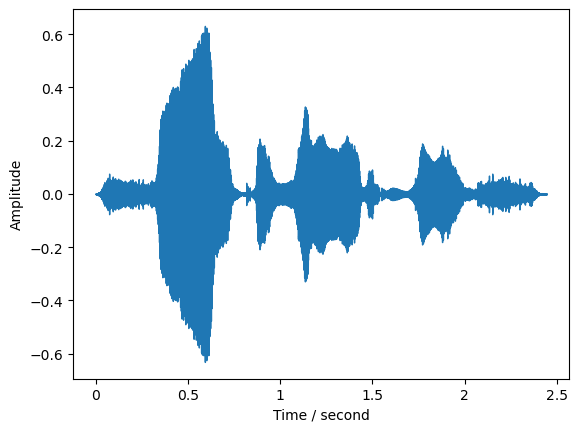

In [298]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lb
from IPython.lib.display import Audio

ex = df['angry'].sample(n=1).values[0]
print('./train/angry/'+ex)
signal, sample_rate = lb.load('./train/angry/'+ex)

# plot audio files in time domain
plt.figure(1)
lb.display.waveshow(y=signal, sr=sample_rate)
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.show()

Audio(data=signal, rate=sample_rate)


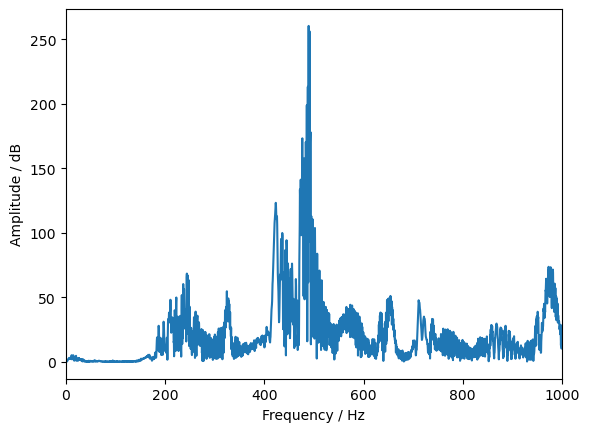

In [299]:
k = np.arange(len(signal))
T = len(signal)/sample_rate
freq = k/T

DATA_0 = np.fft.fft(signal)
abs_DATA_0 = abs(DATA_0)
plt.figure(2)
plt.plot(freq, abs_DATA_0)
plt.xlabel("Frequency / Hz")
plt.ylabel("Amplitude / dB")
plt.xlim([0, 1000])
plt.show()

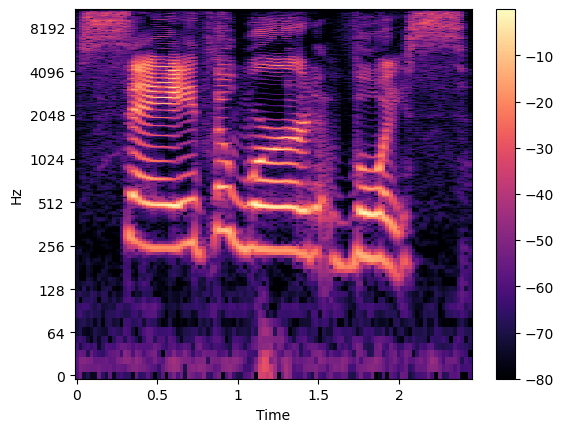

In [300]:
# plot the time-frequency variation of the audio
D = lb.stft(signal)  # STFT of y
S_db = lb.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure(3)
lb.display.specshow(S_db, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()
#
# audio feature extraction: loudness

[0.00079887 0.00356496 0.00831077 0.0126478  0.01360742 0.01252507
 0.01119984 0.01039809 0.01069564 0.01061929 0.00963478 0.00897484
 0.00879813 0.01038391 0.0239838  0.05650924 0.06747118 0.06347644
 0.06283222 0.06292398 0.06760282 0.0735641  0.07823315 0.08346444
 0.08974341 0.09649566 0.09662377 0.07626335 0.04680335 0.03571916
 0.03055613 0.02405899 0.01341315 0.00623624 0.00258431 0.00218683
 0.00301502 0.0148087  0.03279284 0.03600867 0.03095436 0.02422704
 0.01514714 0.01259218 0.01371647 0.01521845 0.02009181 0.04445206
 0.0713361  0.08126213 0.06463295 0.05182123 0.05336336 0.05692515
 0.05289361 0.04924342 0.04795674 0.04584815 0.04787288 0.0474363
 0.04508501 0.03888874 0.01929576 0.0141163  0.02238656 0.01632632
 0.00687759 0.0034933  0.00440968 0.00737493 0.00817092 0.006307
 0.00435763 0.00568048 0.01123001 0.0271921  0.05150601 0.05718711
 0.05216581 0.04711589 0.04662473 0.04375343 0.03401811 0.02694426
 0.01920651 0.01304514 0.00755372 0.00520613 0.00475567 0.0071864

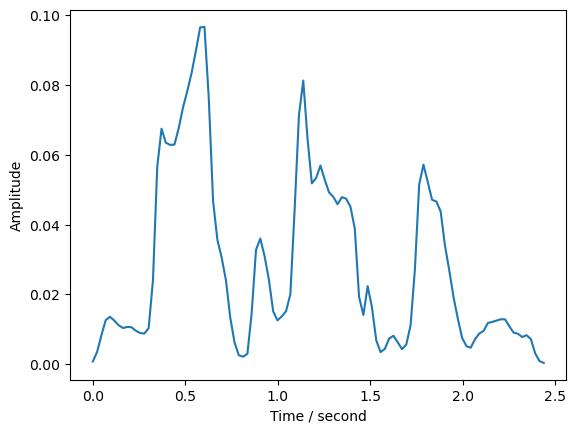

In [301]:
import pandas as pd

df_loudness = pd.DataFrame()
S, phase = lb.magphase(lb.stft(signal))
rms = lb.feature.rms(S=S)
print(rms[0])
df_loudness['Loudness'] = rms[0]
print(df_loudness.head(5))
plt.figure(4)
times = lb.times_like(rms)
plt.plot(times, rms[0])
plt.xlabel("Time / second")
plt.ylabel("Amplitude")
plt.show()

# Step 3: Acoustic Feature Extraction

   Mel_Spectrogram)1  Mel_Spectrogram)2  Mel_Spectrogram)3  Mel_Spectrogram)4  \
0           0.000545           0.001944           0.000937           0.000320   
1           0.000055           0.000281           0.000427           0.000375   
2           0.000026           0.000139           0.000524           0.000596   
3           0.000058           0.000198           0.000652           0.000660   
4           0.000026           0.000136           0.000326           0.000290   

   Mel_Spectrogram)5  Mel_Spectrogram)6  Mel_Spectrogram)7  Mel_Spectrogram)8  \
0           0.000392           0.000415           0.000366           0.000418   
1           0.000327           0.000469           0.000552           0.000604   
2           0.000260           0.000296           0.000509           0.000624   
3           0.000290           0.000937           0.001426           0.001465   
4           0.000231           0.000414           0.000574           0.000543   

   Mel_Spectrogram)9  Mel_

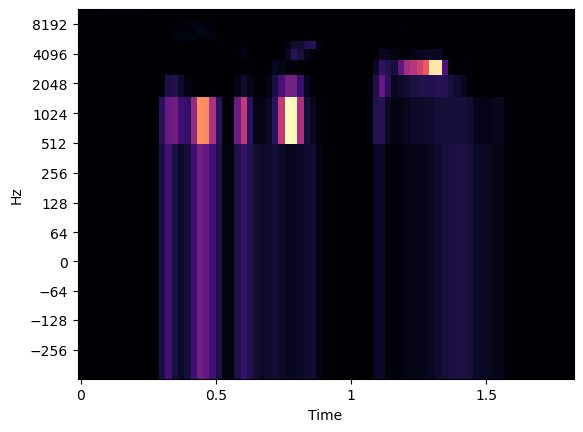

In [302]:
import librosa as lb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('annotated.csv')
ex = df.sample(n=1)
name = ex['emote'].values[0]
path = ex['path'].values[0]

signal, sample_rate = lb.load(path)

df_melspect = pd.DataFrame()
melspect = lb.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
for n_mel in range(len(melspect)):
    df_melspect['Mel_Spectrogram)%d'%(n_mel+1)] = melspect.T[n_mel]
print(df_melspect.head(5))
plt.figure(8)
lb.display.specshow(melspect, sr=sample_rate, x_axis='time', y_axis='log')
plt.show()

   Chroma_1  Chroma_2  Chroma_3  Chroma_4  Chroma_5  Chroma_6  Chroma_7  \
0  0.927907  0.784488  0.701746  0.366601  0.365564  0.448725  0.758509   
1  1.000000  0.970012  1.000000  0.696298  0.744013  0.588119  0.987121   
2  0.410552  0.555898  0.975749  1.000000  1.000000  1.000000  1.000000   
3  0.376580  0.370978  0.399787  0.276571  0.370304  0.747973  0.832991   
4  0.551565  0.480133  0.359865  0.145840  0.197122  0.591302  0.886659   

   Chroma_8  Chroma_9  Chroma_10  Chroma_11  Chroma_12  
0  0.575678  0.600034   0.580112   0.562751   0.634376  
1  0.843040  0.683420   1.000000   1.000000   1.000000  
2  1.000000  1.000000   0.808121   0.643930   0.773554  
3  0.548544  0.546868   0.534767   0.531978   0.751150  
4  0.423409  0.306875   0.324723   0.332110   0.549316  


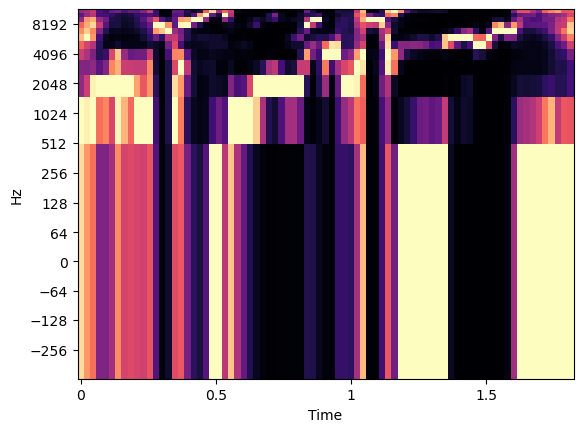

In [303]:
df_chroma = pd.DataFrame()
chromagram = lb.feature.chroma_stft(y=signal, sr=sample_rate)
for n_chroma in range(len(chromagram)):
    df_chroma['Chroma_%d'%(n_chroma+1)] = chromagram.T[n_chroma]
print(df_chroma.head(5))
plt.figure(7)
lb.display.specshow(chromagram, sr=sample_rate, x_axis='time', y_axis='log')
plt.show()

       MFCC_1      MFCC_2      MFCC_3      MFCC_4      MFCC_5      MFCC_6  \
0 -460.768890 -353.992767 -309.988403 -310.740631 -328.390442 -332.618378   
1  -33.976460  -60.264610  -76.737801  -93.989754  -93.036179  -71.585075   
2   25.855236   38.459068   40.364510   50.987232   63.198647   51.742783   
3   35.162041   25.356533    1.460817  -14.402343  -17.175344  -29.302053   
4   -6.940883   -3.101745   -5.786669   -4.286433   13.374348   18.724762   

       MFCC_7      MFCC_8      MFCC_9     MFCC_10     MFCC_11     MFCC_12  
0 -327.239258 -323.267609 -316.570435 -315.199860 -322.001434 -305.692169  
1  -67.385803  -63.495117  -65.239319  -70.224426  -74.380341  -59.828690  
2   41.978886   45.935345   44.144806   45.717987   52.768642   53.926094  
3  -34.640358  -34.742634  -35.086601  -30.170357  -29.016106  -18.111176  
4   13.815102   11.636828    9.372284   11.873123    5.216693    4.771795  


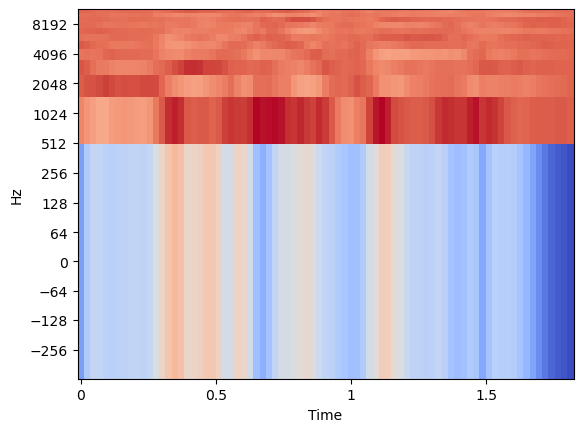

In [304]:
df_mfccs = pd.DataFrame()
mfccs = lb.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
for n_mfcc in range(len(mfccs)):
    df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
print(df_mfccs.head(5))
plt.figure(5)
lb.display.specshow(mfccs, sr=sample_rate, x_axis='time', y_axis='log')
plt.show()

# Step 4: Feature Post-processing

In [305]:
from tqdm import tqdm

train_path = 'train/'

emotions = []
features = []
for e in os.listdir(train_path):
    for wf in os.listdir(train_path + e):
        wf_path = f'train/{e}/{wf}'

        signal, sample_rate = lb.load(wf_path)

        df_melspect = pd.DataFrame()
        melspect = lb.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
        for n_mel in range(len(melspect)):
            df_melspect['Mel_Spectrogram)%d'%(n_mel+1)] = melspect.T[n_mel]

        df_chroma = pd.DataFrame()
        chromagram = lb.feature.chroma_stft(y=signal, sr=sample_rate)
        for n_chroma in range(len(chromagram)):
            df_chroma['Chroma_%d'%(n_chroma+1)] = chromagram.T[n_chroma]

        df_mfccs = pd.DataFrame()
        mfccs = lb.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
        for n_mfcc in range(len(mfccs)):
            df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]

        feature_matrix = pd.concat([df_melspect, df_chroma, df_mfccs], axis=1)
        emotions.append(e)
        features.append(feature_matrix.values)

train_feature_vector = features
train_emotion_vector = emotions

In [306]:
test_path = 'test/'

emotions = []
features = []
for e in os.listdir(test_path):
    for wf in os.listdir(test_path + e):
        wf_path = f'test/{e}/{wf}'

        signal, sample_rate = lb.load(wf_path)

        df_melspect = pd.DataFrame()
        melspect = lb.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
        for n_mel in range(len(melspect)):
            df_melspect['Mel_Spectrogram)%d'%(n_mel+1)] = melspect.T[n_mel]
        #print(df_melspect)

        df_chroma = pd.DataFrame()
        chromagram = lb.feature.chroma_stft(y=signal, sr=sample_rate)
        for n_chroma in range(len(chromagram)):
            df_chroma['Chroma_%d'%(n_chroma+1)] = chromagram.T[n_chroma]
        #print(df_chroma)

        df_mfccs = pd.DataFrame()
        mfccs = lb.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
        for n_mfcc in range(len(mfccs)):
            df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
        #print(df_mfccs)

        feature_matrix = pd.concat([df_melspect, df_chroma, df_mfccs], axis=1)
        emotions.append(e)
        features.append(feature_matrix.values)
        #print(feature_matrix.values)


test_feature_vector = features
test_emotion_vector = emotions

# Step 5: Build your audio emotion recognition model

In [307]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

X_train = train_feature_vector
Y_train = train_emotion_vector

X_test = test_feature_vector
Y_test = test_emotion_vector

sc = StandardScaler()

X_train = np.asanyarray(X_train)
y_train = np.asanyarray(Y_train)
print(X_train.shape)

X_train = np.reshape(X_train, (X_train.shape[0], -1))
print(X_train.shape)

X_train = sc.fit_transform(X_train)

# Test
X_test = np.asanyarray(X_test)
y_test = np.asanyarray(Y_test)
print(X_test.shape)

X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_test.shape)

X_test = sc.transform(X_test)

#KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

#Random Forest
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

#SVM
svc = svm.SVC()
svc.fit(X_train, Y_train)
svc_pred = svc.predict(X_test)


(280, 12, 36)
(280, 432)
(120, 12, 36)
(120, 432)


C:\Users\micha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


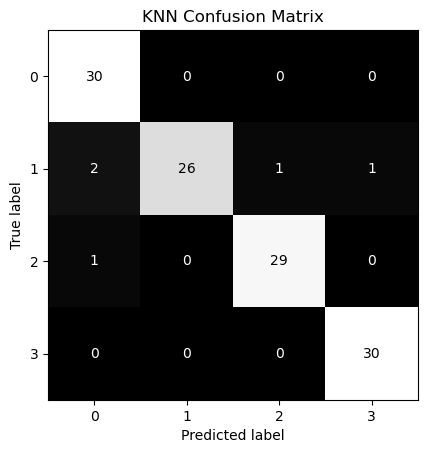

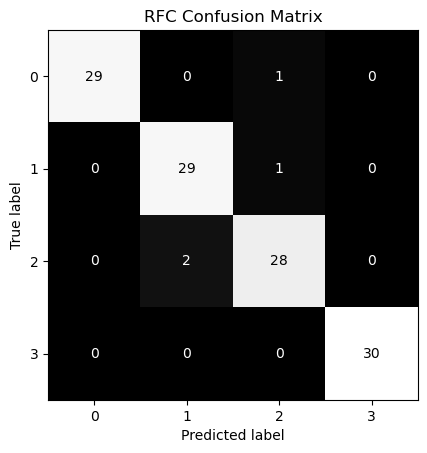

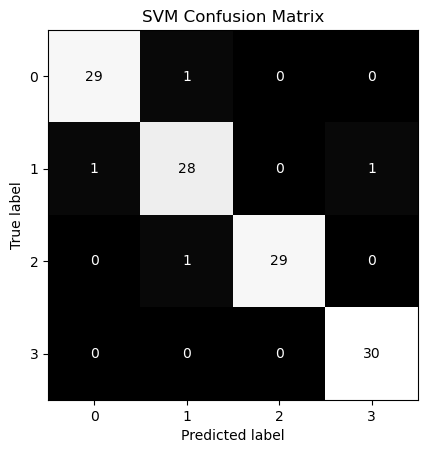

In [308]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = ['KNN', 'RFC', 'SVM']
predictions = [knn_pred, rfc_pred, svc_pred]

for model, prediction in zip(models, predictions):
    disp = ConfusionMatrixDisplay(confusion_matrix(Y_test, prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")